In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from joblib import dump,load


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, SCORERS
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV, ElasticNet

In [7]:
df = pd.read_csv("/Users/kemran/Desktop/ml_stepic/DATA/AMES_Final_DF.csv")

In [9]:
df = df[df.columns[~df.isin([0, 1]).all()]]

In [11]:
first_30_columns = df.iloc[:, :5]  

# Выбираем последний столбец  
last_column = df.iloc[:, -1]  

# Объединяем их в один DataFrame  
df = pd.concat([first_30_columns, last_column], axis=1)  

df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,SalePrice
0,141.000000,31770,6,5,1960,215000
1,80.000000,11622,5,6,1961,105000
2,81.000000,14267,6,6,1958,172000
3,93.000000,11160,7,5,1968,244000
4,74.000000,13830,5,5,1997,189900
...,...,...,...,...,...,...
2920,37.000000,7937,6,6,1984,142500
2921,75.144444,8885,5,5,1983,131000
2922,62.000000,10441,5,5,1992,132000
2923,77.000000,10010,5,5,1974,170000


In [19]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# Множественная линейная регресиия и анализ остатков

In [567]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

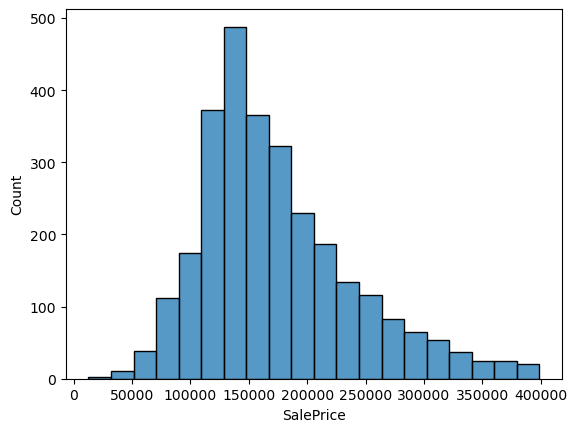

180815.53743589742


In [395]:
sns.histplot(data=df[df['SalePrice']<400000],x='SalePrice',bins=20)
plt.show()
print(df['SalePrice'].mean())

In [569]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

test_residuals = y_test - test_predictions

MAE: 29604.0
MSE: 1767214789.0
RMSE: 42038.0
R2: 0.7253


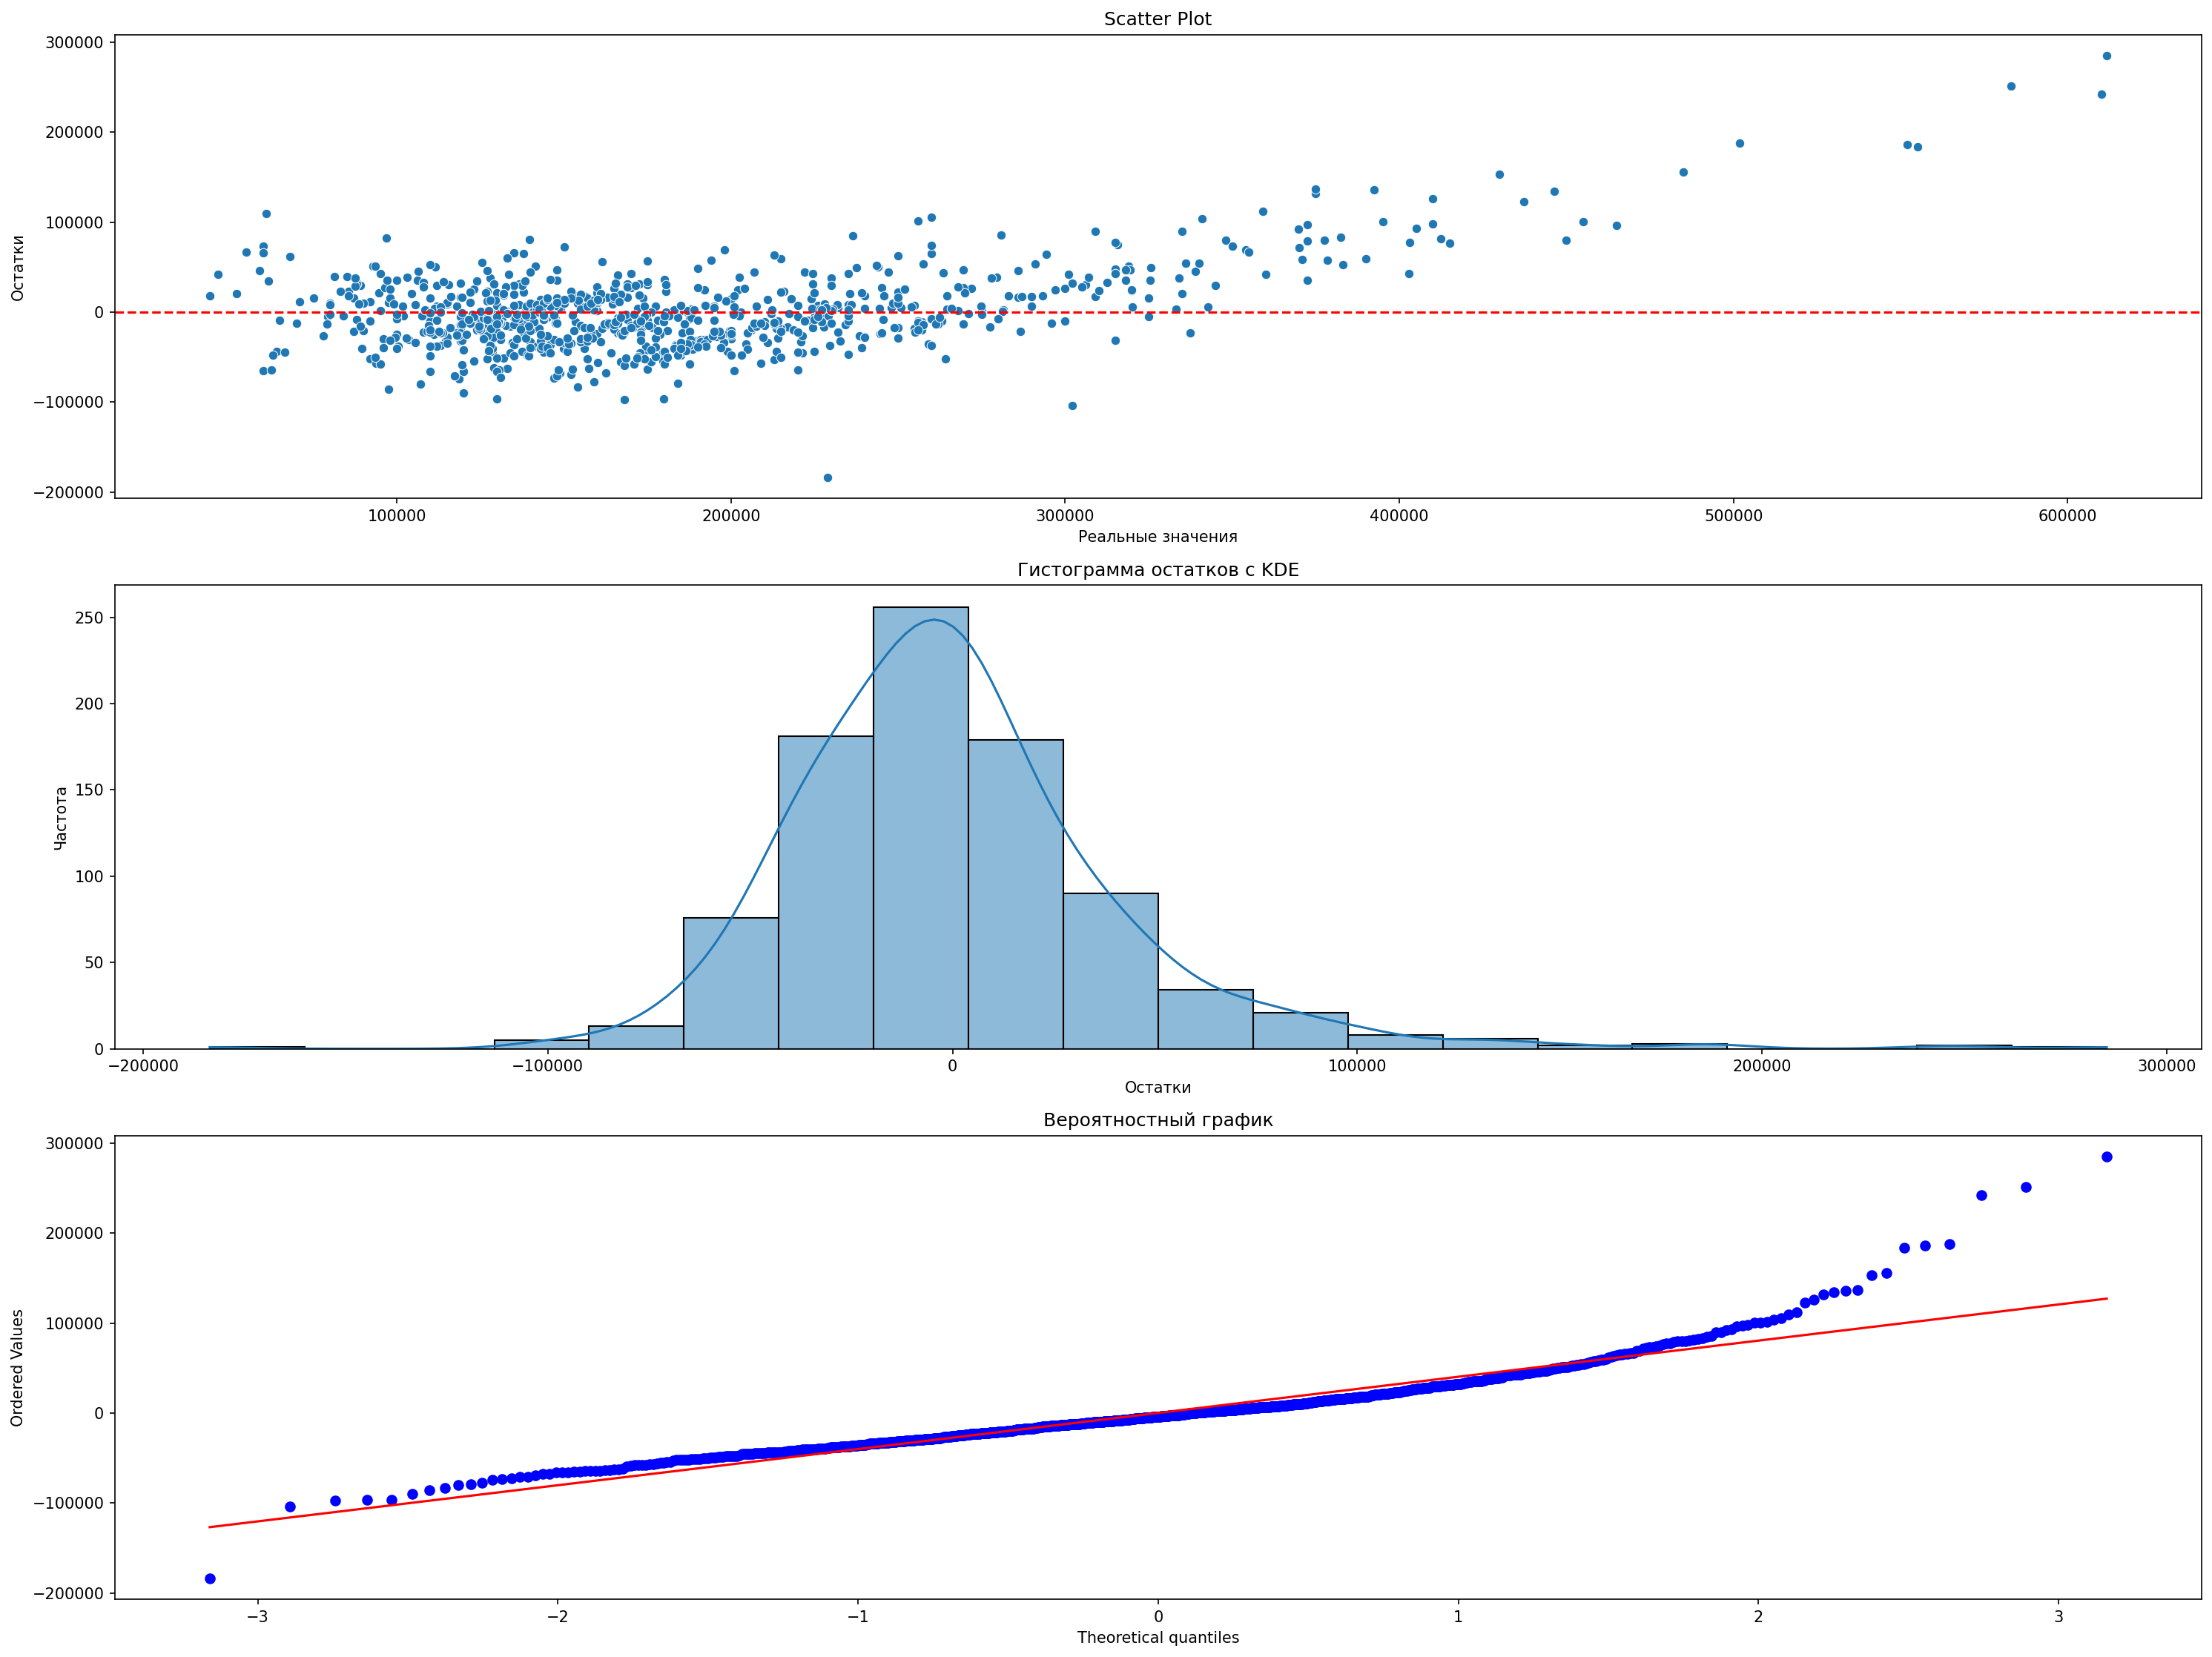

In [399]:
# Анализ остатков (scatterplot,displot с kde и probplot
# Создаем фигуру с тремя подграфиками (1 строка, 3 колонки)  
fig, axs = plt.subplots(3, 1, figsize=(20, 15), dpi=150)  

# Первый график - scatter plot  
sns.scatterplot(x=y_test, y=test_residuals, ax=axs[0])  
axs[0].axhline(y=0, color='red', ls='--')  
axs[0].set_xlabel('Реальные значения')  
axs[0].set_ylabel('Остатки')  
axs[0].set_title('Scatter Plot')  

# Второй график - histogram + KDE plot  
sns.histplot(test_residuals, bins=20, kde=True, ax=axs[1])  
axs[1].set_xlabel('Остатки')  
axs[1].set_ylabel('Частота')  
axs[1].set_title('Гистограмма остатков с KDE')  

# Третий график - вероятностный график  
sp.stats.probplot(test_residuals, plot=axs[2])  
axs[2].set_title('Вероятностный график')  

# Устранение излишнего пустого пространства между графиками  
plt.tight_layout()  
plt.show()  

In [401]:
# Финальное обучение модели на всех данных 
final_model = LinearRegression()
final_model.fit(X,y)
y_hat = final_model.predict(X)


#dump(final_model,'final_salel_model.joblib') # Сохраняем модель

# Полиномиальная регрессия 

In [559]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
#polynomial_converter.fit(X,y)
#poly_features = polynomial_converter.transform(X)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(scaled_X_train,y_train)
test_predictions = model.predict(scaled_X_test)

In [561]:
X.shape

(2925, 5)

In [563]:
poly_features.shape

(2925, 20)

In [565]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

MAE: 24627.0
MSE: 1258474884.0
RMSE: 35475.0
R2: 0.8044


In [521]:
train_rmse_error=[]
test_rmse_error=[]

for i in range (1,10):
    polynomial_converter = PolynomialFeatures(degree=i,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


    scaler = StandardScaler()
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model = LinearRegression()
    model.fit(scaled_X_train,y_train)
    train_predictions = model.predict(scaled_X_train)
    test_predictions = model.predict(scaled_X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [522]:
train_rmse_error[:5]

[42647.77153186381,
 35426.91914001917,
 32952.34253804259,
 31323.717141407877,
 29093.212756048997]

In [571]:
test_rmse_error[:5]

[42038.25388074533,
 35474.989551811304,
 85303.95632963986,
 1197160.6246385053,
 38391098.639231324]

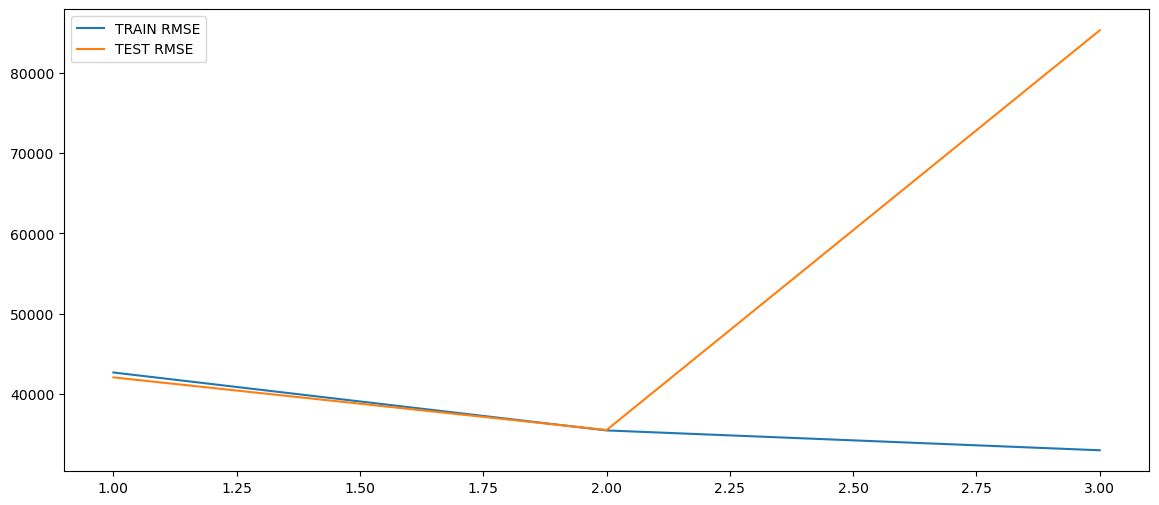

In [577]:
plt.figure(figsize=(14,6),dpi=100)
plt.plot(range(1,4),train_rmse_error[:3],label='TRAIN RMSE')
plt.plot(range(1,4),test_rmse_error[:3],label='TEST RMSE')
plt.legend()
plt.show()

# Ridge Регрессия 

## Просто Ridge

In [659]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ridge_model = Ridge(alpha=1)
ridge_model.fit(scaled_X_train,y_train)
test_predictions = ridge_model.predict(scaled_X_test)

In [661]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))


MAE: 24588.0
MSE: 1256017871.0
RMSE: 35440.0
R2: 0.8048


## Ridge CV (cross validation)

In [798]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ridge_cv_model = RidgeCV(alphas=(0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.15, 1, 10.0, 100.0),scoring = 'r2')#scoring = 'neg_mean_absolute_error')
ridge_cv_model.fit(scaled_X_train,y_train)
test_predictions = ridge_cv_model.predict(scaled_X_test)

In [800]:
ridge_cv_model.alpha_

10.0

In [802]:
ridge_cv_model.best_score_

0.7698934199016297

In [804]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [806]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))


MAE: 24729.0
MSE: 1262623954.0
RMSE: 35533.0
R2: 0.8037


# Lasso CV

In [809]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

lasso_cv_model = LassoCV(eps=0.001,n_alphas=10000,max_iter=10000000)
lasso_cv_model.fit(scaled_X_train,y_train)
test_predictions = lasso_cv_model.predict(scaled_X_test)

In [811]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

MAE: 24780.0
MSE: 1267163625.0
RMSE: 35597.0
R2: 0.803


In [813]:
ridge_cv_model.alpha_

10.0

In [815]:
lasso_cv_model.coef_

array([    -0.        ,     -0.        , -46260.41539299,   1444.00233013,
            0.        ,  -4990.34367702,     -0.        ,  15011.07028768,
            0.        ,     -0.        , -20300.81432051,  31640.24798267,
         2937.00212116,     -0.        ,  84035.37606317,  -1859.22837331,
           -0.        ,      0.        ,   5048.31101895,  14103.50443814])

In [817]:
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_train,train_predictions)),0))

RMSE: 16715.0


# Elastic net CV

In [820]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

elastic_cv_model = ElasticNetCV(l1_ratio = [.1, .5, .7, .9, .95, .99, 1],
                                eps=0.001,n_alphas=1000,max_iter=1000000)
elastic_cv_model.fit(scaled_X_train,y_train)
test_predictions = elastic_cv_model.predict(scaled_X_test)

In [821]:
elastic_cv_model.l1_ratio_

1.0

In [824]:
elastic_cv_model.alpha_

281.53072684858404

In [826]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

MAE: 24771.0
MSE: 1266242623.0
RMSE: 35584.0
R2: 0.8032


# Elastic net with Grid search CV

In [65]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

base_elastic_net_model = ElasticNet()

param_grid = {'alpha':[0.1, 1, 5, 50, 100, 250, 260, 270, 280, 285, 286, 287, 288, 289, 290, 300, 500, 1000], 
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}



grid_model = GridSearchCV(estimator = base_elastic_net_model,
                          param_grid = param_grid,
                          scoring = 'neg_mean_squared_error',
                          cv = 5,
                          verbose=0
                         )

grid_model.fit(scaled_X_train,y_train)
test_predictions = grid_model.predict(scaled_X_test)



/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.097e+10, tolerance: 1.017e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.757e+10, tolerance: 1.076e+09
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.545e+10, toler

In [66]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

MAE: 24773.0
MSE: 1266271573.0
RMSE: 35585.0
R2: 0.8032


In [45]:
grid_model.best_estimator_

ElasticNet(alpha=285, l1_ratio=1)

In [49]:
grid_model.best_params_

{'alpha': 285, 'l1_ratio': 1}

In [55]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018667,0.009554,0.000300,0.000192,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-1.692587e+09,-1.166974e+09,-1.516414e+09,-1.542955e+09,-1.760613e+09,-1.535909e+09,2.057101e+08,27
1,0.019420,0.002198,0.000164,0.000027,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-1.627216e+09,-1.116439e+09,-1.517248e+09,-1.484947e+09,-1.701675e+09,-1.489505e+09,2.019649e+08,24
2,0.026486,0.003059,0.000201,0.000141,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-1.567260e+09,-1.075527e+09,-1.516271e+09,-1.437756e+09,-1.694096e+09,-1.458182e+09,2.086960e+08,22
3,0.052447,0.003068,0.001140,0.001045,0.1,0.9,"{'alpha': 0.1, 'l1_ratio': 0.9}",-1.447611e+09,-1.015219e+09,-1.521173e+09,-1.364675e+09,-1.764778e+09,-1.422691e+09,2.436154e+08,19
4,0.047753,0.007617,0.000158,0.000029,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-1.393546e+09,-9.995958e+08,-1.528170e+09,-1.343895e+09,-1.815997e+09,-1.416241e+09,2.652075e+08,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.002543,0.002118,0.000095,0.000025,1000,0.7,"{'alpha': 1000, 'l1_ratio': 0.7}",-6.786563e+09,-5.383968e+09,-5.325972e+09,-6.288792e+09,-7.182928e+09,-6.193644e+09,7.413122e+08,123
122,0.000982,0.000470,0.000091,0.000005,1000,0.9,"{'alpha': 1000, 'l1_ratio': 0.9}",-6.448778e+09,-5.085331e+09,-5.031471e+09,-5.971869e+09,-6.826918e+09,-5.872873e+09,7.183101e+08,98
123,0.001493,0.001179,0.000088,0.000004,1000,0.95,"{'alpha': 1000, 'l1_ratio': 0.95}",-6.009578e+09,-4.699319e+09,-4.651575e+09,-5.560201e+09,-6.364142e+09,-5.456963e+09,6.872687e+08,85
124,0.001028,0.000773,0.000085,0.000002,1000,0.99,"{'alpha': 1000, 'l1_ratio': 0.99}",-4.073376e+09,-3.034852e+09,-3.025121e+09,-3.749261e+09,-4.341835e+09,-3.644889e+09,5.360010e+08,55


# Elastic net with Random search CV

In [97]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
poly_features = polynomial_converter.fit_transform(X) # Объединили fit и transform

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42) # Вместо X указываем переменуюю poly_features,


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

base_elastic_net_model = ElasticNet()

param_distributions = {'alpha': sp.stats.uniform(200, 300), 
              'l1_ratio': sp.stats.uniform(0, 1.01)}



randomized_model = RandomizedSearchCV(estimator = base_elastic_net_model,
                          param_distributions = param_distributions,
                          scoring = 'neg_mean_squared_error',
                          cv = 5,
                          verbose=0,
                          n_iter = 100,
                          random_state = 42
                         )

randomized_model.fit(scaled_X_train,y_train)
test_predictions = randomized_model.predict(scaled_X_test)

In [99]:
randomized_model.best_estimator_

ElasticNet(alpha=222.36519310393123, l1_ratio=0.9967558059665225)

In [101]:
print(f'MAE:',round(mean_absolute_error(y_test,test_predictions),0))
print(f'MSE:',round(mean_squared_error(y_test,test_predictions),0))
print(f'RMSE:',round(np.sqrt(mean_squared_error(y_test,test_predictions)),0))
print(f'R2:',round(r2_score(y_test, test_predictions),4))

MAE: 27580.0
MSE: 1667562867.0
RMSE: 40836.0
R2: 0.7408
